In [41]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

In [43]:
data=pd.read_csv(r"C:\Users\NEHA JINENDRAN\Downloads\city_day.csv (1).zip")
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [44]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [45]:
data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [47]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [48]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [49]:
data.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [50]:
obj1=LabelEncoder()
obj2=LabelEncoder()
obj3=LabelEncoder()
data['City']=obj1.fit_transform(data['City'])
data['Date']=obj2.fit_transform(data['Date'])
data['AQI_Bucket']=obj3.fit_transform(data['AQI_Bucket'])
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,6
1,0,1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,6
2,0,2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,6
3,0,3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,6
4,0,4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,2004,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,0
29527,25,2005,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,3
29528,25,2006,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,3
29529,25,2007,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,3


In [51]:
data.corr

<bound method DataFrame.corr of        City  Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2  \
0         0     0    NaN    NaN   0.92  18.22  17.15    NaN   0.92  27.64   
1         0     1    NaN    NaN   0.97  15.69  16.46    NaN   0.97  24.55   
2         0     2    NaN    NaN  17.40  19.30  29.70    NaN  17.40  29.07   
3         0     3    NaN    NaN   1.70  18.48  17.97    NaN   1.70  18.59   
4         0     4    NaN    NaN  22.10  21.42  37.76    NaN  22.10  39.33   
...     ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
29526    25  2004  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   
29527    25  2005  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   
29528    25  2006  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   
29529    25  2007  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   
29530    25  2008  15.00  66.00   0.40  26.85  14.05   5.20   0.59   2.10   

           O3  Benzene  Toluene  Xylene   A

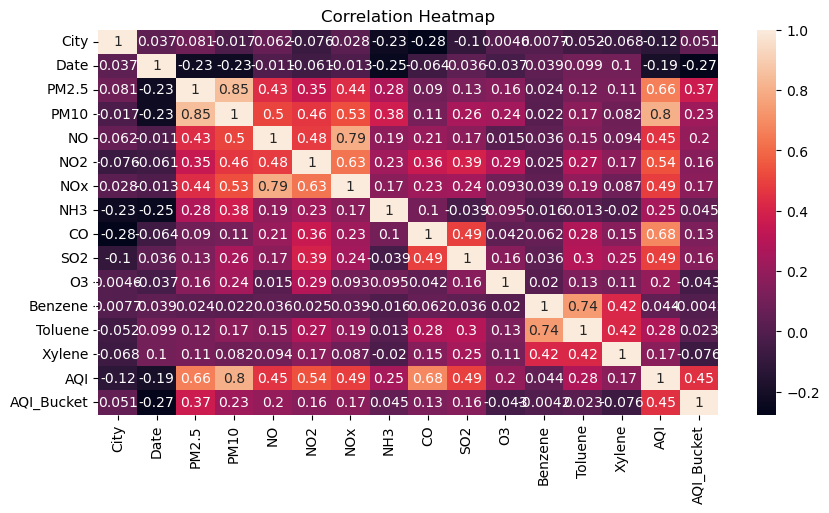

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [55]:
data.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [56]:
median=data['PM10'].median()
data.fillna(median,inplace=True)


In [57]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,0,95.68,95.68,0.92,18.22,17.15,95.68,0.92,27.64,133.36,0.00,0.02,0.00,95.68,6
1,0,1,95.68,95.68,0.97,15.69,16.46,95.68,0.97,24.55,34.06,3.68,5.50,3.77,95.68,6
2,0,2,95.68,95.68,17.40,19.30,29.70,95.68,17.40,29.07,30.70,6.80,16.40,2.25,95.68,6
3,0,3,95.68,95.68,1.70,18.48,17.97,95.68,1.70,18.59,36.08,4.43,10.14,1.00,95.68,6
4,0,4,95.68,95.68,22.10,21.42,37.76,95.68,22.10,39.33,39.31,7.01,18.89,2.78,95.68,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,2004,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.00,0
29527,25,2005,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.00,3
29528,25,2006,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.00,3
29529,25,2007,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.00,3


In [58]:
data.duplicated().sum()

np.int64(0)

In [59]:
x=data.drop(['AQI_Bucket'],axis=1)
y=data.AQI_Bucket

In [60]:
x

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0,0,95.68,95.68,0.92,18.22,17.15,95.68,0.92,27.64,133.36,0.00,0.02,0.00,95.68
1,0,1,95.68,95.68,0.97,15.69,16.46,95.68,0.97,24.55,34.06,3.68,5.50,3.77,95.68
2,0,2,95.68,95.68,17.40,19.30,29.70,95.68,17.40,29.07,30.70,6.80,16.40,2.25,95.68
3,0,3,95.68,95.68,1.70,18.48,17.97,95.68,1.70,18.59,36.08,4.43,10.14,1.00,95.68
4,0,4,95.68,95.68,22.10,21.42,37.76,95.68,22.10,39.33,39.31,7.01,18.89,2.78,95.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,2004,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.00
29527,25,2005,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.00
29528,25,2006,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.00
29529,25,2007,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.00


In [61]:
y

0        6
1        6
2        6
3        6
4        6
        ..
29526    0
29527    3
29528    3
29529    3
29530    0
Name: AQI_Bucket, Length: 29531, dtype: int64

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
xtrain

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
6688,6,1167,142.27,252.49,17.11,33.82,50.91,9.80,4.36,17.18,17.68,0.00,95.68,95.68,325.00
29333,25,1811,75.61,121.94,2.95,27.03,16.78,15.92,1.12,8.24,74.21,4.93,7.53,1.13,128.00
27996,24,1936,15.01,27.65,3.25,7.99,9.71,6.01,0.48,5.80,29.78,95.68,95.68,95.68,46.00
26848,23,1900,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68
21186,19,1340,16.66,95.68,7.44,28.00,23.79,28.83,0.82,5.03,14.32,0.09,0.21,95.68,69.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,19,1729,21.75,95.68,7.97,18.64,16.24,2.02,0.91,4.19,26.03,1.05,3.61,95.68,70.00
5390,4,1096,38.06,74.54,9.91,42.23,22.62,95.68,1.04,3.20,25.89,95.68,95.68,95.68,73.00
860,0,860,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68,95.68
15795,14,1217,36.08,95.82,5.67,31.21,18.75,15.34,0.70,5.92,48.88,0.88,3.81,0.78,101.00


In [64]:
xtest

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
22593,20,738,95.68,95.68,95.68,95.68,95.68,95.68,0.00,95.68,95.68,95.68,95.68,95.68,95.68
22459,20,604,95.68,95.68,95.68,95.68,95.68,95.68,0.00,95.68,95.68,95.68,95.68,95.68,95.68
24213,21,500,58.50,95.68,11.23,17.05,28.29,95.68,1.14,5.13,24.20,0.14,0.64,0.31,137.00
25301,21,1588,78.57,95.68,6.85,5.45,5.57,95.68,1.33,39.86,71.68,1.88,16.32,6.97,190.00
20886,19,1040,200.80,95.68,40.04,50.59,60.42,35.47,1.22,9.71,42.18,0.15,1.19,95.68,339.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17614,15,1922,31.20,81.56,3.07,12.75,13.24,18.84,0.54,14.14,51.63,0.92,18.76,95.68,79.00
6198,4,1904,38.15,87.04,4.96,26.49,27.94,12.13,0.93,7.97,55.40,0.56,2.03,95.68,91.00
9648,8,1814,65.45,84.77,4.19,16.87,20.82,86.50,0.66,8.04,36.82,3.78,0.14,95.68,106.00
16507,14,1929,35.21,66.35,6.95,18.03,14.06,13.20,0.41,3.48,29.34,0.94,2.50,0.14,68.00


In [65]:
ytrain

6688     5
29333    1
27996    0
26848    6
21186    3
        ..
21575    3
5390     3
860      6
15795    1
23654    1
Name: AQI_Bucket, Length: 23624, dtype: int64

In [66]:
ytest

22593    6
22459    6
24213    1
25301    1
20886    5
        ..
17614    3
6198     3
9648     1
16507    3
7395     1
Name: AQI_Bucket, Length: 5907, dtype: int64

In [69]:
#from sklearn.preprocessing import StandardScaler
#st_x=StandardScaler()
#xtrain=st_x.fit_transform(xtrain)
#xtest=st_x.transform(xtest)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [71]:
model1=LogisticRegression()
model1.fit(xtrain,ytrain)

C:\Users\NEHA JINENDRAN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
ypred=model1.predict(xtest)
ypred

array([6, 6, 2, ..., 3, 3, 3])

In [73]:
model1.score(xtrain,ytrain)

0.7209194039959363

In [74]:
model1.score(xtest,ytest)

0.7100050787201625

In [75]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[ 104,    1,    0,  116,    0,    0,   16],
       [   0, 1383,  150,  221,   11,   23,   28],
       [   0,  213,  236,    0,   26,   78,    0],
       [  35,  322,    9, 1212,    0,    0,   33],
       [   0,    0,   20,    0,  167,   85,    0],
       [   0,    4,  106,    0,   88,  273,    0],
       [   3,   65,    0,   58,    0,    2,  819]])

In [76]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)
cr
for i in cr:
    print(i,end=" ")

                            p r e c i s i o n         r e c a l l     f 1 - s c o r e       s u p p o r t 
 
                       0               0 . 7 3             0 . 4 4             0 . 5 5               2 3 7 
                       1               0 . 7 0             0 . 7 6             0 . 7 3             1 8 1 6 
                       2               0 . 4 5             0 . 4 3             0 . 4 4               5 5 3 
                       3               0 . 7 5             0 . 7 5             0 . 7 5             1 6 1 1 
                       4               0 . 5 7             0 . 6 1             0 . 5 9               2 7 2 
                       5               0 . 5 9             0 . 5 8             0 . 5 9               4 7 1 
                       6               0 . 9 1             0 . 8 6             0 . 8 9               9 4 7 
 
         a c c u r a c y                                                       0 . 7 1             5 9 0 7 
       m a c r o   a v g 

In [77]:
model2=GradientBoostingClassifier(n_estimators=100,random_state=3)
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=3)

In [78]:
ypred=model2.predict(xtest)
ypred

array([6, 6, 1, ..., 1, 3, 1])

In [79]:
model2.score(xtrain,ytrain)

1.0

In [80]:
model2.score(xtest,ytest)

1.0

In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[ 237,    0,    0,    0,    0,    0,    0],
       [   0, 1816,    0,    0,    0,    0,    0],
       [   0,    0,  553,    0,    0,    0,    0],
       [   0,    0,    0, 1611,    0,    0,    0],
       [   0,    0,    0,    0,  272,    0,    0],
       [   0,    0,    0,    0,    0,  471,    0],
       [   0,    0,    0,    0,    0,    0,  947]])

In [82]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)
cr
for i in cr:
    print(i,end=" ")

                            p r e c i s i o n         r e c a l l     f 1 - s c o r e       s u p p o r t 
 
                       0               1 . 0 0             1 . 0 0             1 . 0 0               2 3 7 
                       1               1 . 0 0             1 . 0 0             1 . 0 0             1 8 1 6 
                       2               1 . 0 0             1 . 0 0             1 . 0 0               5 5 3 
                       3               1 . 0 0             1 . 0 0             1 . 0 0             1 6 1 1 
                       4               1 . 0 0             1 . 0 0             1 . 0 0               2 7 2 
                       5               1 . 0 0             1 . 0 0             1 . 0 0               4 7 1 
                       6               1 . 0 0             1 . 0 0             1 . 0 0               9 4 7 
 
         a c c u r a c y                                                       1 . 0 0             5 9 0 7 
       m a c r o   a v g 

In [83]:
model3=RandomForestClassifier(n_estimators=100,random_state=42)
model3.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [84]:
ypred=model3.predict(xtest)
ypred

array([6, 6, 1, ..., 1, 3, 1])

In [85]:
model3.score(xtrain,ytrain)

1.0

In [86]:
model3.score(xtest,ytest)

0.9957677331979008

In [87]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[ 234,    0,    0,    3,    0,    0,    0],
       [   0, 1816,    0,    0,    0,    0,    0],
       [   0,    0,  553,    0,    0,    0,    0],
       [   0,    0,    0, 1609,    0,    0,    2],
       [   0,    1,    0,    0,  268,    3,    0],
       [   0,    0,    5,    0,    1,  465,    0],
       [   0,    0,    0,   10,    0,    0,  937]])

In [88]:
from sklearn.metrics import classification_report
cr=classification_report(ytest,ypred)
cr
for i in cr:
    print(i,end=" ")

                            p r e c i s i o n         r e c a l l     f 1 - s c o r e       s u p p o r t 
 
                       0               1 . 0 0             0 . 9 9             0 . 9 9               2 3 7 
                       1               1 . 0 0             1 . 0 0             1 . 0 0             1 8 1 6 
                       2               0 . 9 9             1 . 0 0             1 . 0 0               5 5 3 
                       3               0 . 9 9             1 . 0 0             1 . 0 0             1 6 1 1 
                       4               1 . 0 0             0 . 9 9             0 . 9 9               2 7 2 
                       5               0 . 9 9             0 . 9 9             0 . 9 9               4 7 1 
                       6               1 . 0 0             0 . 9 9             0 . 9 9               9 4 7 
 
         a c c u r a c y                                                       1 . 0 0             5 9 0 7 
       m a c r o   a v g 

C:\Users\NEHA JINENDRAN\AppData\Local\Temp\ipykernel_20372\3510795444.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


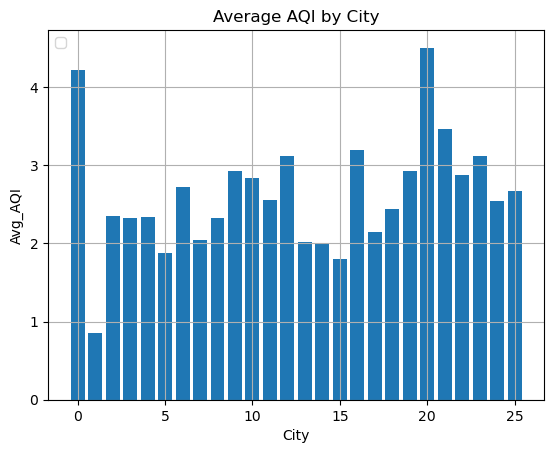

In [89]:
Avg_AQI=data.groupby('City')['AQI_Bucket'].mean().sort_values(ascending=False)
width=0.25
plt.bar(Avg_AQI.index,Avg_AQI.values)
plt.legend(loc='upper left')
plt.xlabel('City')
plt.ylabel("Avg_AQI")
plt.title('Average AQI by City')
plt.grid(True)
plt.show()

In [90]:
def predict_aqi(city, pm25, pm10, no2, so2, co, o3):
    try:
        city_encoded = city_encoder.transform([city])[0]
    except ValueError:
        return "Enter a valid city name from the dataset"

    features = np.array([[ 
        city_encoded,
        pm25,
        pm10,
        no2,
        so2,
        co,
        o3
    ]])

    # Apply scaling if used during training
    features = scaler.transform(features)

    prediction = model.predict(features)[0]
    return f"Predicted AQI: {round(prediction, 2)}"

iface = gr.Interface(
    fn=predict_aqi,
    inputs=[
        gr.Textbox(label="City"),
        gr.Number(label="PM2.5"),
        gr.Number(label="PM10"),
        gr.Number(label="NO2"),
        gr.Number(label="SO2"),
        gr.Number(label="CO"),
        gr.Number(label="O3")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Air Quality Index (AQI) Prediction",
    description="Enter air pollutant values to predict AQI (India)"
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
